# Никитин 4217
## Вариант 4
**Данные о болезнях сердца:**
1. возраст: возраст пациента (лет)
2. анемия: снижение количества эритроцитов или гемоглобина (логическое значение)
3. высокое кровяное давление: если у пациента гипертония (логическое значение)
4. креатининфосфокиназа (КФК): уровень фермента КФК в крови (мкг/л)
5. диабет: если у пациента диабет (логическое значение)
6. фракция выброса: процент крови, покидающей сердце при каждом сокращении (в процентах)
7. тромбоциты: тромбоциты в крови (килотромбоциты/ мл)
8. пол: женщина или мужчина (бинарный)
9. креатинин сыворотки: уровень креатинина сыворотки в крови (мг/дл)
10. натрий сыворотки: уровень натрия сыворотки в крови (мэкв/л)
11. курение: если пациент курит или нет (логическое)
12. время: период наблюдения (дни)
13. событие смерти: если пациент умер в течение периода наблюдения (логическое значение)

**Порядок выполнения**
1. Загрузить набор данных.
2. Провести предварительную обработку данных.
3. Выделить целевую переменную, которую необходимо предсказать. Не включать эту целевую
переменную в модель. Построить матрицу диаграмм рассеяния, выделив значения целевой переменной
разными цветами.
4. Разбить набор данных на тренировочной и тестовый датасеты с помощью train_test_split и выполнить
стандартизацию числовых данных с помощью StandardScaler.
5. Для получения оценки 5 - разработать предсказательную модель качественного отклика методами:
метод k- ближайших соседей
дерево решений
логистическая регрессия
случайный лес.
Для получения оценки 4 - разработать предсказательную модель качественного отклика любыми
двумя методами.
6. Оценить ошибку классификации для каждого метода. Подсчитать метрики "Accuracy", "Precision",
"Recall", "Balanced accuracy", 'F1 score'.
7. Построить матрицу неточностей с помощью confusion_matrix для каждого метода.
8. Построить графики ROC-кривой для каждого метода на одном графике (4 линии на одном графике) для
сравнения.
9. Сделать вывод о качестве построенного классификатора по подсчитанным выше метрикам.


Сначала был считан датафрейм 4heart2.csv с помощью pd.readcsv(). И проведена проверка на наличие пропусков и дубликатов явных и не явных.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, confusion_matrix, roc_curve, auc

# Считывание файла csv
df = pd.read_csv("4heart2.csv")

# Подсчёт явных дубликатов и пропущенных ячеек
num_duplicates = df.duplicated().sum()
num_missing_values = df.isnull().sum().sum()

print(f"Количество пустых ячеек: {num_missing_values}")
print(f"Количество дубликатов: {num_duplicates}")

# Получения информации для вывода о не явных дубликатах
for column in df.columns:
    print(f"Уникальные значения в колонке: {column}")
    print(df[column].unique())

Количество пустых ячеек: 0
Количество дубликатов: 0
Уникальные значения в колонке: age
[75.    55.    65.    50.    90.    60.    80.    62.    45.    49.
 82.    87.    70.    48.    68.    53.    95.    58.    94.    85.
 69.    72.    51.    57.    42.    41.    67.    79.    59.    44.
 63.    86.    66.    43.    46.    61.    81.    52.    64.    40.
 60.667 73.    77.    78.    54.    47.    56.   ]
Уникальные значения в колонке: anaemia
[0 1]
Уникальные значения в колонке: creatinine_phosphokinase
[ 582 7861  146  111  160   47  246  315  157  123   81  231  981  168
   80  379  149  125   52  128  220   63  148  112  122   60   70   23
  249  159   94  855 2656  235  124  571  127  588 1380  553  129  577
   91 3964   69  260  371   75  607  789  364 7702  318  109   68  250
  110  161  113 5882  224   92  102  203  336   76   55  280   78   84
  115   66  897  154  144  133  514   59  156   61  305  898 5209   53
  328  748 1876  936  292  369  143  754  400   96  737  358  2

По результатам проверки было выяснено, что дубликаты и пропуски отсутствуют. Далее была выделена целевая переменная DEATH_EVENT и простроена матрица диаграмм рассеяния.

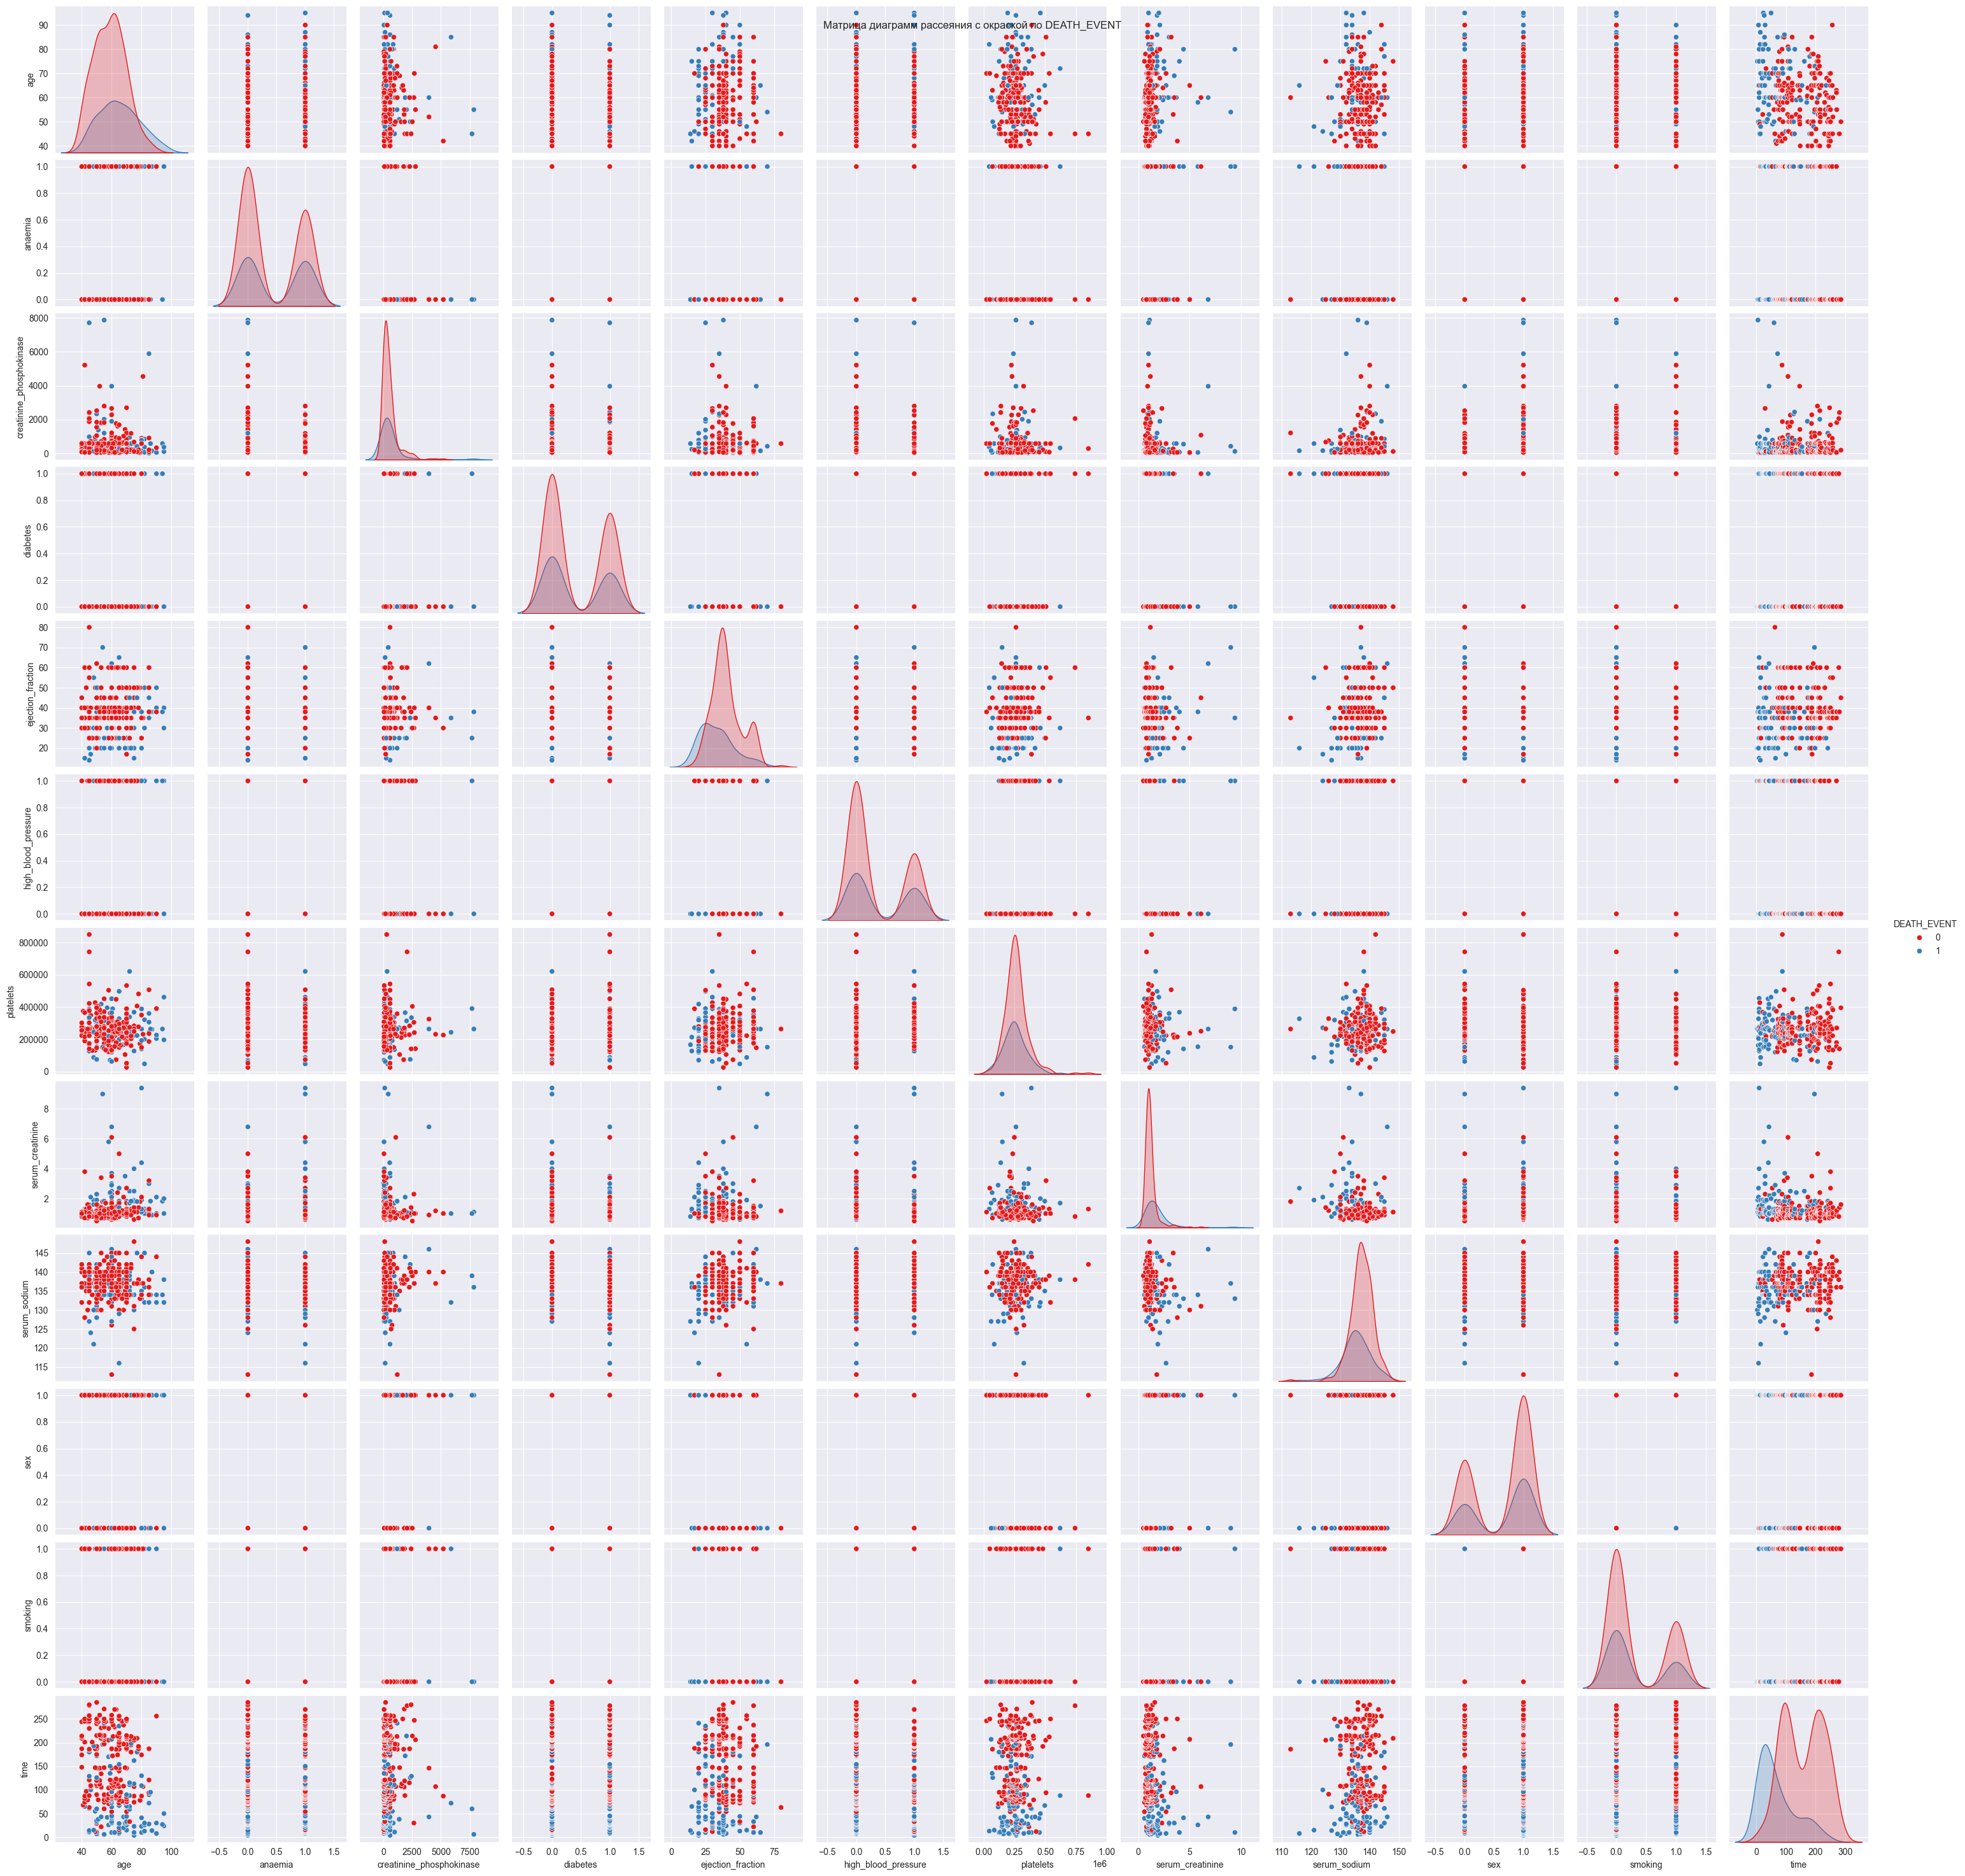

In [2]:
# Выделение целевой переменной
target = df['DEATH_EVENT']

# Выделение не целевых данных
features = df.drop(columns=['DEATH_EVENT'])

# Построение матрицы диаграмм рассеяния
sns.pairplot(df, hue='DEATH_EVENT', palette='Set1', diag_kind='kde')
plt.suptitle('Матрица диаграмм рассеяния с окраской по DEATH_EVENT')
# Сохранение для добавления в отчёт
plt.savefig('scatter_matrix.png')
plt.show()

Матрица диаграмм рассеяния показывает, как признаки связаны между собой и как они распределяются относительно целевой переменной DEATH_EVENT. Видно, что классы частично разделимы, но в некоторых случаях сильно пересекаются, что говорит о том, что задача классификации не из простых. Есть признаки, которые могут быть полезными для предсказания, но для более точного анализа придется использовать дополнительные методы, например, корреляцию или построение сложных моделей. В целом, график помогает понять структуру данных и наметить дальнейшие шаги в исследовании.

Далее набор данных был разбит на обучающие и тестовые датасеты. После этого стандартизирован.

In [3]:
# Разбиение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

## Стандартизация числовых данных

#Создание стандартного скейлера
scaler = StandardScaler()

# Список числовых признаков для стандартизации
numeric_features = ["age", "creatinine_phosphokinase", "ejection_fraction",
                    "platelets", "serum_creatinine", "serum_sodium", "time"]

# Стандартизация числовых признаков отдельно для тренировочного и тестового набора
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

# Результаты
# Тренировочные данные: X_train, y_train
# Тестовые данные: X_test, y_test

Данные были разбиты в пропорции 3/1 для тренировочных и тестовых соответственно. Заскейлены были только числовые данные, значения bool не изменялись. Далее были реализованы методы классификаций и получены их метрики.

In [4]:
# Метод ближайших соседей
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

# Дерево решений
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

# Логистическая регрессия
lr = LogisticRegression(random_state=0, max_iter=10000)
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)

# Случайный лес
rf = RandomForestClassifier(random_state=0, n_estimators=100)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

for name, data in {"Метод бижайших соседей": knn_y_pred, "Дерево решений": dt_y_pred,
                   "Логистическая регрессия": lr_y_pred, "Случайный лес": rf_y_pred}.items():
    print(name)
    print(f"accuracy_score: {accuracy_score(y_test, data)}")
    print(f"precision_score: {precision_score(y_test, data)}")
    print(f"recall_score: {recall_score(y_test, data)}")
    print(f"f1_score: {f1_score(y_test, data)}")
    print(f"balanced_accuracy_score: {balanced_accuracy_score(y_test, data)}\n")

Метод бижайших соседей
accuracy_score: 0.8
precision_score: 0.8
recall_score: 0.5925925925925926
f1_score: 0.6808510638297872
balanced_accuracy_score: 0.7546296296296295

Дерево решений
accuracy_score: 0.7733333333333333
precision_score: 0.7083333333333334
recall_score: 0.6296296296296297
f1_score: 0.6666666666666666
balanced_accuracy_score: 0.7418981481481481

Логистическая регрессия
accuracy_score: 0.7733333333333333
precision_score: 0.7777777777777778
recall_score: 0.5185185185185185
f1_score: 0.6222222222222222
balanced_accuracy_score: 0.7175925925925926

Случайный лес
accuracy_score: 0.84
precision_score: 0.8947368421052632
recall_score: 0.6296296296296297
f1_score: 0.7391304347826086
balanced_accuracy_score: 0.7939814814814815



**Accuracy (Точность)** - это общая доля правильных предсказаний. Высокая точность желательна, но важно помнить, что для несбалансированных классов (например, если один класс встречается гораздо чаще другого) высокая точность не всегда означает хорошую модель.

**Precision (Точность предсказания)** показывает, насколько точно модель предсказывает положительные классы. Это особенно важно, если ошибка "ложноположительный" (когда модель ошибочно предсказывает положительный класс) имеет серьезные последствия. Например, в медицинской диагностике ложноположительные результаты могут привести к ненужным лечению.

**Recall (Полнота)** показывает, насколько хорошо модель находит все положительные классы, т.е. долю истинных положительных среди всех положительных наблюдений. Высокий recall важен, если вы хотите не пропустить положительные случаи (например, в медицине, где важно не пропустить болезнь).

**F1 Score** — это гармоническое среднее между precision и recall. Это полезная метрика, когда важно сбалансировать precision и recall, особенно когда классы несбалансированы. Он помогает избежать ситуации, когда модель имеет высокое значение одной метрики, но низкое значение другой.

**Balanced Accuracy (Сбалансированная точность)** — это среднее значение точности для каждого класса. Это особенно полезно в случае несбалансированных данных, где класс с малым количеством наблюдений может быть проигнорирован, если используется обычная accuracy.

**Метрики**

Наибольшее Accuracy имеет случайный лес 0.84

Наибольшее Precision имеет случайный лес 0.89

Наибольшее Recall имеет дерево решений и случайный лес 0.63

Наибольшее F1 Score имеет случайный лес 0.74

Наибольшее Balanced Accuracy Score имеет случайный лес 0.79

**Ранжирование**

Случайный лес — лучшая модель по всем меткам.

Метод ближайших соседей — находится на втором месте.

Дерево решений — стабильно хорошая модель, но уступает KNN по меткам точности.

Логистическая регрессия — хорошая модель, но результаты по полноте поиска положительных классов оставляют желать лучшего.

Далее были созданы матрицы неточностей.

In [5]:
cm_knn = confusion_matrix(y_test, knn_y_pred)
cm_dt = confusion_matrix(y_test, dt_y_pred)
cm_lr = confusion_matrix(y_test, lr_y_pred)
cm_rf = confusion_matrix(y_test, rf_y_pred)

confusion_dict = {"Метод бижайших соседей": cm_knn, "Дерево решений": cm_dt,
                  "Логистическая регрессия": cm_lr, "Случайный лес": cm_rf}

print("confusion_matrix")
for name, data in confusion_dict.items():
    print(name)
    print("    0  1")
    print(f"T0->{data[0][0]} {data[0][1]}<-F1")
    print(f"F0->{data[1][0]} {data[1][1]}<-T1")
    print()

confusion_matrix
Метод бижайших соседей
    0  1
T0->44 4<-F1
F0->11 16<-T1

Дерево решений
    0  1
T0->41 7<-F1
F0->10 17<-T1

Логистическая регрессия
    0  1
T0->44 4<-F1
F0->13 14<-T1

Случайный лес
    0  1
T0->46 2<-F1
F0->10 17<-T1



Случайный лес выглядит самой точной моделью среди представленных, поскольку имеет наименьшее количество ошибок для класса "0" и достаточно хорошую классификацию для класса "1". Дерево решений и логистическая регрессия дают схожие результаты, но немного хуже, чем случайный лес, особенно для класса "1", где количество ложных отрицаний выше. Метод ближайших соседей имеет наибольшее количество ошибок, особенно для положительного класса, что делает его менее подходящим для данной задачи по сравнению с другими методами, однако списывать его со счетов ещё рано.

Далее были построены графики ROC-кривой для каждого метода на одном графике (4 линии на одном графике) для сравнения.

Случайный лес (AUC = 0.934)
Метод ближайших соседей (AUC = 0.872)
Логистическая регрессия (AUC = 0.848)
Дерево решений (AUC = 0.742)


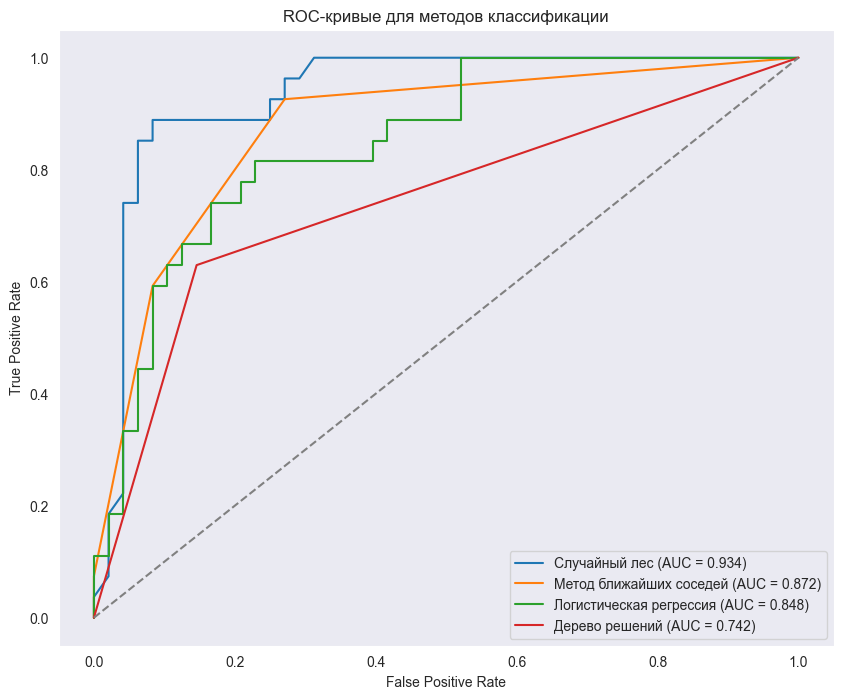

In [6]:
# Предсказания вероятностей положительного класса
knn_y_prob = knn.predict_proba(X_test)[:, 1]
dt_y_prob = dt.predict_proba(X_test)[:, 1]
lr_y_prob = lr.predict_proba(X_test)[:, 1]
rf_y_prob = rf.predict_proba(X_test)[:, 1]

# ROC-кривые и AUC
models = {
    "Случайный лес": rf_y_prob,
    "Метод ближайших соседей": knn_y_prob,
    "Логистическая регрессия": lr_y_prob,
    "Дерево решений": dt_y_prob
}

plt.figure(figsize=(10, 8))

range_master = {}

for name, y_prob in models.items():

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    label = f'{name} (AUC = {roc_auc:.3f})'
    print(f'{name} (AUC = {roc_auc:.3f})')
    plt.plot(fpr, tpr, label=label)

# Диагональ случайной классификации
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Оформление графика
plt.title('ROC-кривые для методов классификации')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('roc_curve.png')
plt.show()

AUC — это метрика, которая оценивает качество классификатора на всех возможных порогах, определяющих границу между положительным и отрицательным классом. AUC измеряет способность модели правильно классифицировать объекты, при этом значение AUC варьируется от 0 до 1. Чем выше значение AUC, тем лучше модель различает положительные и отрицательные классы.

Случайный лес имеет наилучший показатель AUC (0.934), что означает, что он наиболее точно классифицирует как положительные, так и отрицательные классы.
Метод ближайших соседей (KNN) и логистическая регрессия показывают хорошие результаты (AUC 0.872 и 0.848 соответственно), но всё же не достигают уровня случайного леса.
Дерево решений с AUC 0.742 имеет наихудший показатель среди рассмотренных моделей, что говорит о том, что оно менее эффективно в решении задачи классификации.

На основании подсчитанных метрик можно сделать следующие выводы о качестве классификаторов:

**Случайный лес** лучший по всем метрикам: высокая точность (accuracy), сбалансированная метрика (balanced accuracy), а также высокие значения AUC (0.934) и F1-score. Модель хорошо справляется как с классификацией положительных, так и отрицательных примеров. Рекомендуется для использования, если важна высокая точность предсказания и есть достаточно ресурсов для работы с этим более сложным методом.

**Метод ближайших соседей** занимает уверенное второе место: AUC = 0.872, F1-score и другие метрики указывают на хорошее качество. Немного уступает случайному лесу в способности балансировать между ложноположительными и ложноотрицательными ошибками. Подходит для задач, где важна простота метода и интерпретация.

**Логистическая регрессия** имеет AUC = 0.848, что указывает на хорошую способность различать классы. F1-score немного ниже, что указывает на возможную проблему с балансом классов. Рекомендуется, если важна интерпретация модели и простота её работы.

**Дерево решений** имеет самое слабое качество классификации: AUC = 0.742, F1-score и точность также ниже остальных методов. Склонно к переобучению или недообучению при выбранных параметрах. Может быть улучшено с помощью ансамблевых методов, таких как случайный лес или бустинг.



В итоге: для более точных вычислений рекомендуется использовать случайный лес, для более быстрых (но точных) вычислений рекомендуется использовать логистическую регрессию для малых наборов данных, либо метод ближайших соседей для больших наборов.

# Дополнительное задание на 4
**Задание 13.** Реализовать функцию для вычисления специфичности (TNR). Применить эту функцию и вывести её
значения для каждого метода.

Сначала была найдена формула. TNR = TN / (TN + FP), а далее реализована.

In [7]:
# Функция для вычисления специфичности (TNR)
def specificity(confusion_matrix):
    tn, fp = confusion_matrix[0][0], confusion_matrix[0][1]
    return tn / (tn + fp) if (tn + fp) > 0 else 0

# Вычисление специфичности для каждого метода
for name, cm in confusion_dict.items():
    tnr = specificity(cm)
    print(f"{name} специфичность (TNR): {tnr:.3f}")

Метод бижайших соседей специфичность (TNR): 0.917
Дерево решений специфичность (TNR): 0.854
Логистическая регрессия специфичность (TNR): 0.917
Случайный лес специфичность (TNR): 0.958


Высокое значение TNR означает, что модель редко ошибается, классифицируя отрицательные примеры как положительные.

Метод ближайших соседей (TNR = 0.917) правильно классифицирует 91.7% отрицательных примеров. Это указывает на хорошую способность метода распознавать отрицательный класс.

У дерева решений (TNR = 0.854) специфичность ниже, чем у других методов. Оно правильно классифицирует 85.4% отрицательных примеров. Дерево решений чаще ошибается, помечая отрицательные примеры как положительные.

У логистической регрессии (TNR = 0.917) результат совпадает с методом ближайших соседей, что говорит о схожей способности справляться с отрицательными примерами.

Случайный лес (TNR = 0.958) имеет наивысшую специфичность (95.8%). Это говорит о том, что случайный лес лучше других методов справляется с классификацией отрицательного класса, минимизируя ложные срабатывания.

Таким образом, для предсказания отрицательных примеров лучше всего подходит случайный лес.

**Задание 14.** Написать программу, которая для дерева решений для разного параметра max_depth будет считать accuracy_score для тренировочных и тестовых данных (использовать predict на X_train и X_valid). Выполнить визуализацию: по оси х - значение параметра max_depth (от 1 до 16), по оси y - Accuracy, построить две линии для тренировочных и тестовых данных.

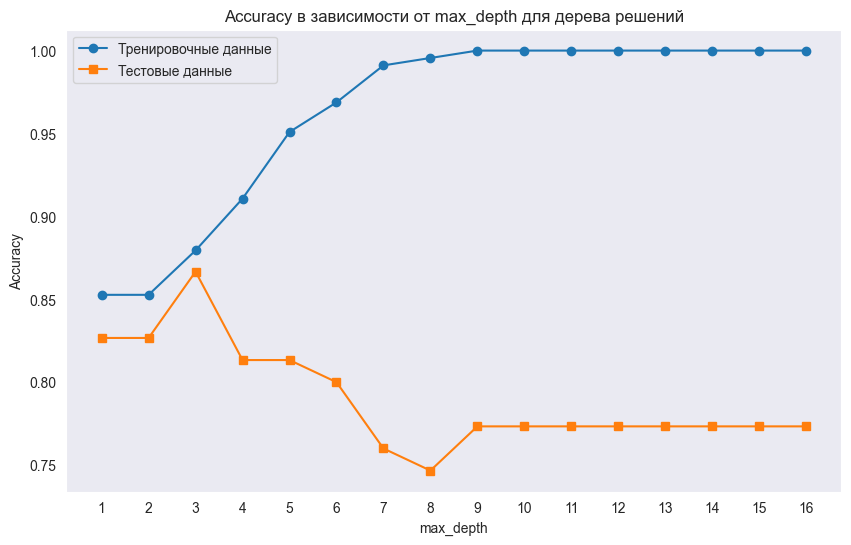

In [8]:
# Диапазон значений max_depth
max_depth_values = range(1, 16 + 1)

# Списки для хранения значений accuracy
train_accuracies = []
test_accuracies = []

# Вычисление accuracy для каждого значения max_depth
for depth in max_depth_values:
    # Создание и обучение модели с текущим значением max_depth
    dt = DecisionTreeClassifier(max_depth=depth, random_state=0)
    dt.fit(X_train, y_train)

    # Предсказания на тренировочных и тестовых данных
    y_train_pred = dt.predict(X_train)
    y_test_pred = dt.predict(X_test)

    # Вычисление accuracy
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Тренировочные данные', marker='o')
plt.plot(max_depth_values, test_accuracies, label='Тестовые данные', marker='s')

# Оформление графика
plt.title('Accuracy в зависимости от max_depth для дерева решений')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.legend()
plt.grid()
plt.show()

С увеличением значения max_depth точность на тренировочных данных стремится к 1. Это очевидно, так как более глубокое дерево способно лучше подгоняться под тренировочный набор, вплоть до полного запоминания данных.

При малых значениях max_depth (1–3] дерево недостаточно сложное и имеет низкую точность как на тренировочных, так и на тестовых данных. Это явление называется недообучением.

При увеличении max_depth точность на тестовых данных сначала растёт (до 3), достигая пика, а затем начинает снижаться. Это указывает на переобучение. Дерево слишком хорошо запоминает тренировочные данные, но теряет способность обобщать на новые примеры.

Оптимальным значением max_depth является 3, так как точность на тестовых данных достигает максимума. Это говорит о том, что модель хорошо обобщает данные без избыточного запоминания, при этом обучена достаточно хорошо.

До этого в работе использовалось не ограниченное дерево. Следовательно, оно было переобучено. Далее будет использовано дерево и получены его метрики.

Случайный лес (AUC = 0.934)
Неограниченное дерево решений (AUC = 0.742)
Ограниченное 3 дерево решений (AUC = 0.894)


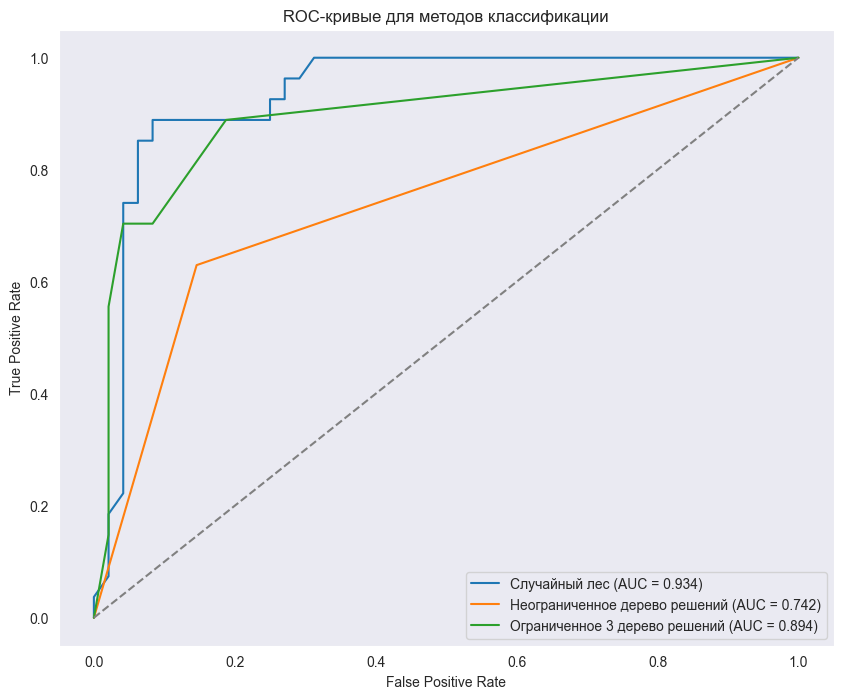

Дерево решений, ограниченное 3 уровнем
accuracy_score: 0.8666666666666667
precision_score: 0.9047619047619048
recall_score: 0.7037037037037037
f1_score: 0.7916666666666666
balanced_accuracy_score: 0.8310185185185186



In [9]:
# Дерево решений
dt3 = DecisionTreeClassifier(max_depth=3, random_state=0)
dt3.fit(X_train, y_train)
dt3_y_pred = dt3.predict(X_test)

dt3_y_prob = dt3.predict_proba(X_test)[:, 1]

# ROC-кривые и AUC
models = {
    "Случайный лес": rf_y_prob,
    "Неограниченное дерево решений": dt_y_prob,
    "Ограниченное 3 дерево решений": dt3_y_prob,
}

plt.figure(figsize=(10, 8))

range_master = {}

for name, y_prob in models.items():

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    label = f'{name} (AUC = {roc_auc:.3f})'
    print(f'{name} (AUC = {roc_auc:.3f})')
    plt.plot(fpr, tpr, label=label)

# Диагональ случайной классификации
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Оформление графика
plt.title('ROC-кривые для методов классификации')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('roc_curve.png')
plt.show()

print("Дерево решений, ограниченное 3 уровнем")
print(f"accuracy_score: {accuracy_score(y_test, dt3_y_pred)}")
print(f"precision_score: {precision_score(y_test, dt3_y_pred)}")
print(f"recall_score: {recall_score(y_test, dt3_y_pred)}")
print(f"f1_score: {f1_score(y_test, dt3_y_pred)}")
print(f"balanced_accuracy_score: {balanced_accuracy_score(y_test, dt3_y_pred)}\n")

Случайный лес
* accuracy_score: 0.84
* precision_score: 0.8947368421052632
* recall_score: 0.6296296296296297
* f1_score: 0.7391304347826086
* balanced_accuracy_score: 0.7939814814814815

Старое дерево решений
* accuracy_score: 0.7733333333333333
* precision_score: 0.7083333333333334
* recall_score: 0.6296296296296297
* f1_score: 0.6666666666666666
* balanced_accuracy_score: 0.7418981481481481

Таким образом дерево решений, ограниченное 3 уровнем глубины является лучшей моделью, чем представленный случайный лес, старое дерево решений или любая другая модель, использованная в этой работе. Однако стоит заметить, что коэффициент AUC всё-таки больше у случайного леса. Это говорит о том, что случайный лес в основном предсказывает точнее.

Поэтому использовать случайный лес необходимо в общем случае, а дерево решений необходимо использовать в том случае, если требуется более точное предсказание положительных сценариев. В таком случае для данной задачи лучше использовать ограниченное 3 уровнем дерево решений. Так как оно имеет больший recall и больший precision.